# Njets plots using different weights

In [1]:
#Set up
import os, sys
sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *
sys.path.append(os.getcwd() + "/../tools/")
sys.path.append(os.getcwd() + "/../tools/fit/")
sys.path.append(os.getcwd() + "/../tools/bjetsys/")
from lepton_eff import muonEff, electronEff
from pile_up import pileUpFunction, Min_Bias
from cross_section_calc import calc_cross_stuff, cross_calc, stat_unc_calc, normalization_unc_calc, pseudo_data_yield_sum
from fit import pack_data_dic, pack_mc_dic, MinFunction
import pile_up
import BTagCalibrationStandalone as BT


import matplotlib
import warnings

Welcome to JupyROOT 6.10/00
home /home/gunter/WW_analysis/production/Analysis_13TeV
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [2]:
%matplotlib inline

In [42]:
scales, df    = load_testset("lep")
#df = load_presel_w_fDY_fTT_MC(unc="")
df = pre_cuts(df[(df.lep2_pt > 25) & (df.mll > 30)], diff_charge=False)
df_da = pre_cuts(load_presel_w_fDY_fTT_DATA(), diff_charge=False)
df_da = df_da[(df_da.lep2_pt > 25) & (df_da.mll > 30)]

#df_ww = rp.read_root(data_path+"/ww_complete.root")

#df = df[df.metFilter_flag == 0]
#df_da = df_da[df_da.metFilter_flag == 0]

df_da["weight"] = np.array([1.0] * df_da.shape[0]) 
warnings.filterwarnings('ignore')

#print process_yields(df, df_da, scales=scales)
#process_yields(df.query("pred_fDY_WW > .9 & pred_fTT_WW > .6"), df_da.query("pred_fDY_WW > .9 & pred_fTT_WW > .6"), scales=scales)

In [47]:
ana_obj = analysis_setup(unc="lep")
scales = ana_obj.scales
ana_obj.apply_pre_cuts()
df = ana_obj.df
df_da = ana_obj.df_da
#process_yields(rf_ana(ana_obj.df), rf_ana(ana_obj.df_da), scales=scales)

    Diff Flavor          Process  Same Flavor
0         33976               WW        27085
1          3216  GluGluWWTo2L2Nu         2614
2         37191        Total: WW        29700
3         87202               DY      3222148
4         83065              Top        67343
5          1924               WZ         3381
6            50               ZZ         1173
7          1832            WG(*)          930
8           888            Higgs          935
9             0               WJ            0
10       212153            Total      3325610
11       116749             DATA      1800165


Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/WW_analysis/data_alpha/ww_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ; //


## table

In [5]:
process_yields(ana_obj.df, ana_obj.df_da, scales=scales)

,Diff Flavor,Process,Same Flavor
0,15653,WW,12121
1,1256,GluGluWWTo2L2Nu,979
2,16909,Total: WW,13100
3,22932,DY,1212205
4,38876,Top,31206
5,895,WZ,1584
6,18,ZZ,563
7,1724,WG(*),186
8,265,Higgs,283
9,1919,WJ,4893


In [11]:
#df["weight"] = 1

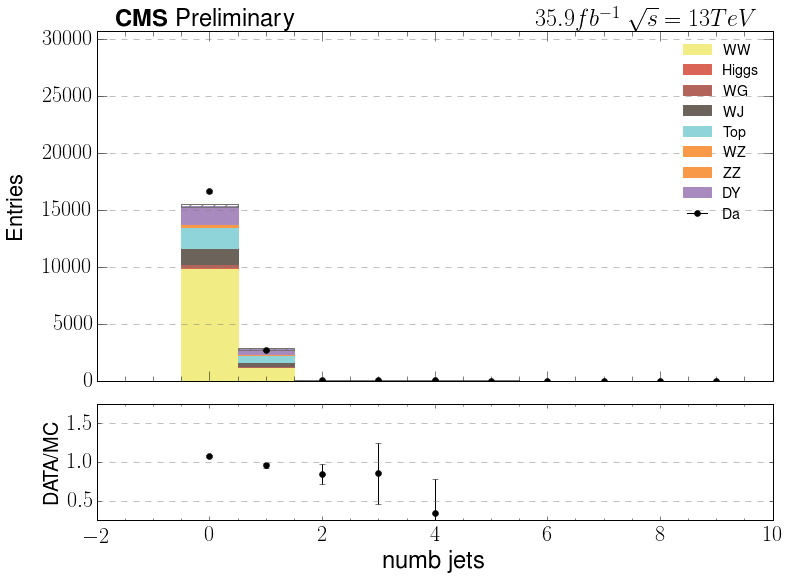

In [51]:
scales_ = {}
for key in plotting_options.process_decay.unique():
  scales_[key] = eval(plotting_options[plotting_options.process_decay == key]["scale"].values[0])

a, b, c, d= full_bin_plot(df, df_da, "numb_jets", query="pred_fDY_WW > .9 & pred_fTT_WW > .6" ,scales=scales, logy=False, x_range=None, y_range=None)

In [39]:
print df[df.process_decay == "WW"].shape[0], df[df.process_decay == "WW"].shape[0] * scales_["WW"]
print pre_cuts(df[df.process_decay == "WW"]).shape[0], pre_cuts(df[df.process_decay == "WW"]).shape[0] * scales_["WW"]

224406 50218.8100516
190040 42528.1973842


In [41]:
print pre_cuts(df[df.process_decay == "WW"]).shape[0], pre_cuts(df[df.process_decay == "WW"]).shape[0] * scales["WW"]

114151 42541.9472074


In [37]:
df[df.process_decay == "WW"].shape[0], df[df.process_decay == "WW"].shape[0] * scales["WW"] 

(147691, 50101.097524449986)

In [5]:
static_weights = df.weight.values.copy()

In [12]:
df["weight"] = static_weights
df.weight.values[df.process == "Top"] = calc_bjet_weight(df[df.process == "Top"], reader)

## table2

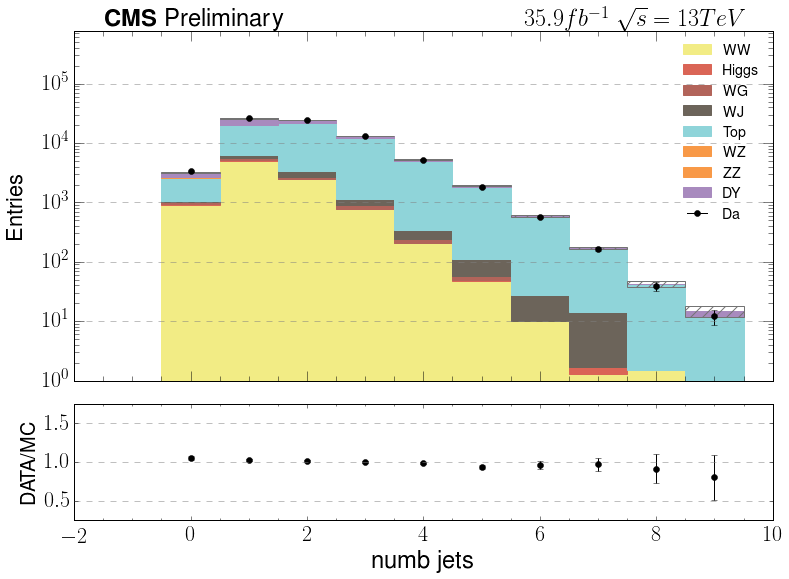

In [5]:
a, b, c, d= full_bin_plot(df, df_da, "numb_jets", query="pred_fDY_WW > .6 & pred_fTT_WW < .6",scales=scales, logy=True, x_range=None, y_range=None)

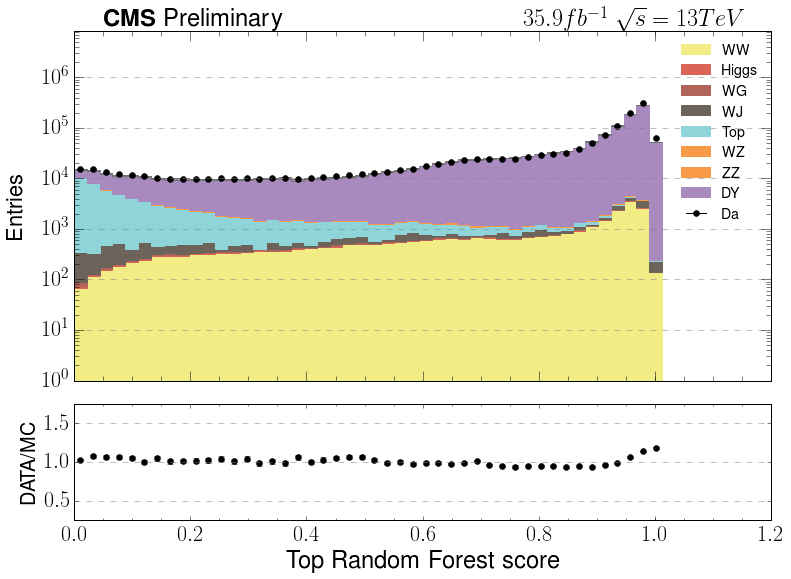

In [8]:
a, b, c, d= full_bin_plot(df, df_da, "pred_fTT_WW", query=None,scales=scales, logy=True, x_range=None, y_range=None)

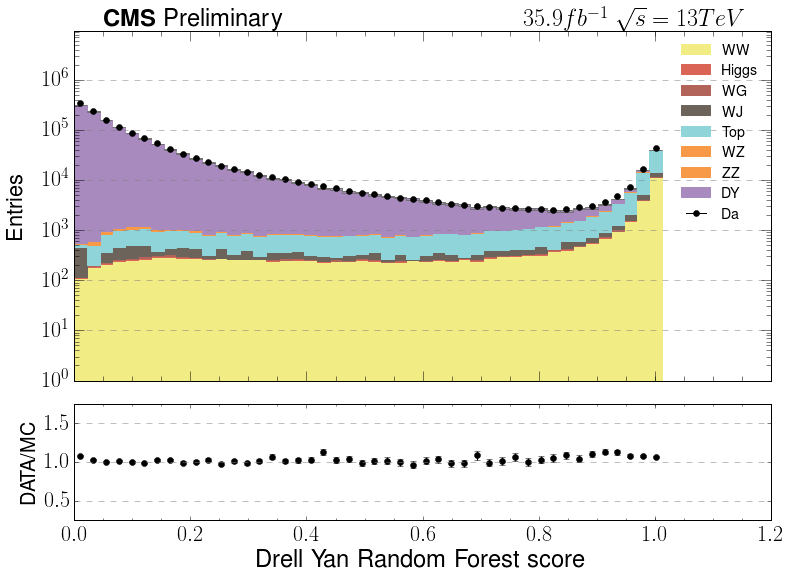

In [9]:
a, b, c, d= full_bin_plot(df, df_da, "pred_fDY_WW", query=None,scales=scales, logy=True, x_range=None, y_range=None)

In [9]:
process_yields(df.query("pred_fDY_WW > .9 & pred_fTT_WW > .6"), df_da.query("pred_fDY_WW > .9 & pred_fTT_WW > .6"), scales=scales)

,Diff Flavor,Process,Same Flavor
0,9961,WW,1466
1,875,GluGluWWTo2L2Nu,154
2,10836,Total: WW,1620
3,1448,DY,280
4,2446,Top,444
5,281,WZ,56
6,3,ZZ,32
7,852,WG(*),0
8,143,Higgs,23
9,528,WJ,170


In [14]:
from cross_section_calc import pseudo_data_yield_sum
pseudo = pseudo_data_yield_sum(df.query("pred_fDY_WW > .9 & pred_fTT_WW > .6"), df_da.query("pred_fDY_WW > .9 & pred_fTT_WW > .6"), scales=scales)
cross_orig   =  cross_calc(df, df_da, df_ww, None, scales,  fiducial=True, pseudo=pseudo)

    Diff Flavor          Process  Same Flavor
0          9961               WW         1466
1           875  GluGluWWTo2L2Nu          154
2         10836        Total: WW         1620
3          1448               DY          280
4          2446              Top          444
5           281               WZ           56
6             3               ZZ           32
7           852            WG(*)            0
8           143            Higgs           23
9           528               WJ          170
10        16266            Total         2538
11        16660             DATA         2760
N_ww_tot 60427.6040812 11427 0.189102317951 0.223785505074


# Fitting

In [6]:
from scipy.optimize import curve_fit, minimize

df["weight"] = static_weights 
#df.weight.values[df.process == 'Top'] = calc_bjet_weight(df[df.process == "Top"], reader)

data_control_dic = {}
mc_control_dic = {}
pack_data_dic(data_control_dic, df_da)
pack_mc_dic(mc_control_dic, df, df_da, scales)

func_obj = MinFunction(mc_control_dic, data_control_dic)

print func_obj.min_func([0,0,0])
temp1 = minimize(func_obj.min_func, [1.,1., 1.], method='SLSQP')

print temp1
func_obj.fit_result = temp1.x
for i in ["ww", "tt", "dy"]:
    func_obj.uncertainty_for = i
    if i == "ww":
        t = func_obj.fit_result[0] + 0.01
    if i == "tt":
        t = func_obj.fit_result[1] - 0.001
    if i == "dy":
        t = func_obj.fit_result[2] - 0.001
    print i, t
    minimize(func_obj.unc_func, [t], method='SLSQP')

1378485.50222
     fun: 2.991208264415292
     jac: array([  5.75184822e-06,   8.94069672e-08,   5.57303429e-06])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.88850954,  1.02716798,  1.04922503])
ww 0.898509541077
0.000115715485981 [0.90072936818029881, 1.027167984338311, 1.0492250295789247] [ 0.88850954  1.02716798  1.04922503]
0.000115715485981 [0.90072936818029881, 1.027167984338311, 1.0492250295789247] [ 0.88850954  1.02716798  1.04922503]
0.000118154620873 [0.90072938308146, 1.027167984338311, 1.0492250295789247] [ 0.88850954  1.02716798  1.04922503]
0.000821619933999 [0.90072364046547027, 1.027167984338311, 1.0492250295789247] [ 0.88850954  1.02716798  1.04922503]
0.000151693317632 [0.90072773441638609, 1.027167984338311, 1.0492250295789247] [ 0.88850954  1.02716798  1.04922503]
2.13860811593e-06 [0.90072864816448694, 1.027167984338311, 1.0492250295789247] [ 0.88850954  1.02716798  1.04922503

In [7]:
from scipy.optimize import curve_fit, minimize

df["weight"] = static_weights 
#df.weight.values[df.process == 'Top'] = calc_bjet_weight(df[df.process == "Top"], reader)

data_control_dic = {}
mc_control_dic = {}
feature = "metMod"
pack_data_dic(data_control_dic, df_da, feature)
pack_mc_dic(mc_control_dic, df, df_da, scales, feature)

func_obj_template = MinFunction(mc_control_dic, data_control_dic)

print func_obj_template.min_func([0,0,0])
temp2 = minimize(func_obj_template.min_func, [1.,1., 1.], method='SLSQP')

print temp2
func_obj.fit_result = temp2.x
for i in ["ww", "tt", "dy"]:
    func_obj.uncertainty_for = i
    if i == "ww":
        t = func_obj.fit_result[0] + 0.01
    if i == "tt":
        t = func_obj.fit_result[1] - 0.001
    if i == "dy":
        t = func_obj.fit_result[2] - 0.001
    print i, t
    temp2 = minimize(func_obj.unc_func, [t], method='SLSQP')


1376859.12115
     fun: 1200.0563271499573
     jac: array([ -3.05175781e-05,   9.15527344e-05,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.85116033,  1.02637619,  1.04899926])
ww 0.861160325954
0.000751655627798 [0.84927185753913215, 1.026376192390821, 1.04899925545001] [ 0.85116033  1.02637619  1.04899926]
0.000751655627798 [0.84927185753913215, 1.026376192390821, 1.04899925545001] [ 0.85116033  1.02637619  1.04899926]
0.000759728775316 [0.84927187244029334, 1.026376192390821, 1.04899925545001] [ 0.85116033  1.02637619  1.04899926]
0.000297047818897 [0.84926992192205963, 1.026376192390821, 1.04899925545001] [ 0.85116033  1.02637619  1.04899926]
0.000297047818897 [0.84926992192205963, 1.026376192390821, 1.04899925545001] [ 0.85116033  1.02637619  1.04899926]
0.000288974285024 [0.84926993682322083, 1.026376192390821, 1.04899925545001] [ 0.85116033  1.02637619  1.04899926]
0.0002

# End

In [6]:
scales_ = scales.copy()
scales_

{'DY1JetsToLL_M-10to50': 0.9252904392678166,
 'DY1JetsToLL_M-50': 0.7766378163951988,
 'DY2JetsToLL_M-10to50': 0.36225877324669714,
 'DY2JetsToLL_M-50': 0.29735738661210365,
 'DY3JetsToLL_M-10to50': 1.0727670109000442,
 'DY3JetsToLL_M-50': 0.16653798371286863,
 'DY4JetsToLL_M-10to50': 1.0495385182234422,
 'DY4JetsToLL_M-50': 0.1291829374743375,
 'DYJetsToLL_M-10to50': 6.528888910020416,
 'DYJetsToLL_M-50': 2.882240719468713,
 'Da': 1,
 'GluGluHToWWTo2L2Nu': 0.3499964108235247,
 'GluGluWWTo2L2Nu': 0.06057407,
 'T_s-channel': 0.1141288390921382,
 'T_t-channel': 0.3378220326116155,
 'T_tW-channel': 0.40448777527555274,
 'Tbar_s-channel': 0.63184,
 'Tbar_t-channel': 0.2805844225276096,
 'Tbar_tW-channel': 0.406151676920305,
 'W1JetsToLNu': 9.089684109965036,
 'W2JetsToLNu': 4.536110409181353,
 'W3JetsToLNu': 2.0668813378510253,
 'W4JetsToLNu': 2.4821297734604895,
 'WGToLNuG': 8.072542833475318,
 'WGstarToLNu2E': 0.042796573443762906,
 'WW': 0.22378550507364844,
 'WZJetsTo2L2Q': 0.007615269

In [7]:
ss, SS = (0., 0.)
ds, DS = (0., 0.)

wj_scales = []

for i in df[df.process == "WJ"].process_decay.unique():
    wj_scales.append(scales[i])
    ss += df[(df.process_decay == i) & (df.lep1_Charge == df.lep2_Charge)].shape[0] * 1.0000#* scales[i]
    ds += df[(df.process_decay == i) & (df.lep1_Charge != df.lep2_Charge)].shape[0] * 1.0000#* scales[i]
    
    SS += df[(df.process_decay == i) & (df.lep1_Charge == df.lep2_Charge)].weight.sum() * scales[i]
    DS += df[(df.process_decay == i) & (df.lep1_Charge != df.lep2_Charge)].weight.sum() * scales[i]
    
print ss, ds, (ss / ds**2 + ss**2 / ds**3)**.5, ds/ss, (ss / ds**2 + ss**2 / ds**3)**.5 / (ds/ss)
print SS, DS, (sum(wj_scales)**2 / DS**2  * ss + SS**2 / (ds**4 * sum(wj_scales)**2) * ds)**.5, DS/SS, (SS / DS**2 + SS**2 / DS**3)**.5 / (DS/SS)

309.0 617.0 0.0349025362643 1.99676375405 0.0174795521972
1193.38372401 2532.75515424 0.126213602406 2.12233090102 0.00779500978774


In [8]:
a = process_yields(df[(df.pred_fDY_WW > .9) & (df.pred_fTT_WW > .6)], df_da[(df_da.pred_fDY_WW > .9) & (df_da.pred_fTT_WW > .6)], scales=scales)

In [14]:
save_df_to_html(a, "temp_ww_yields.html")

In [17]:
for i in df[df.process == "WJ"].process_decay.unique():
    print scales[i]

9.08968410997
4.53611040918
2.06688133785
2.48212977346


In [18]:
sum(wj_scales)

18.174805630457904

In [9]:
a

,Diff Flavor,Process,Same Flavor
0,2731,GluGluWWTo2L2Nu,503
1,12706,WW,1990
2,15437,WW,2493
3,2011,DY,743
4,8641,Top,1788
5,485,WZ,94
6,4,ZZ,44
7,1157,WG(*),0
8,187,Higgs,27
9,793,WJ,225


In [8]:
a = df.jet1_flv.value_counts()

In [10]:
type(a)

pandas.core.series.Series

In [13]:
df[df.jet1_pt > 15].jet1_pt.min()

20.000038

In [27]:
tally_light = 0
for row in rf_ana(df[df.process == "WW"]).iterrows():
    temp_tally = 0
    if row[1].jet1_flv == 0:
        temp_tally += 1
    if row[1].jet2_flv == 0:
        temp_tally += 1
    if row[1].jet3_flv == 0:
        temp_tally += 1
    if row[1].jet4_flv == 0:
        temp_tally += 1
    if row[1].jet5_flv == 0:
        temp_tally += 1
    if row[1].jet6_flv == 0:
        temp_tally += 1
    tally_light += temp_tally
    
print tally_light / float(rf_ana(df[df.process == "WW"]).shape[0])
print tally_light, df[df.process == "WW"].shape[0]

0.521443210283
20609 104545


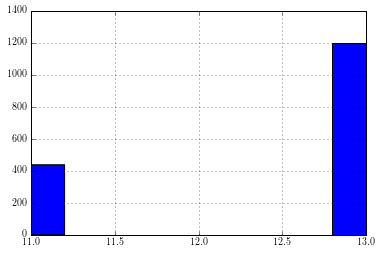

In [32]:
df[df.process == "Higgs"].lep2_type.hist()

In [36]:
for process in df.process_decay.unique():
    print process, df[df.process_decay == process].lep_Type.value_counts()

DYJetsToLL_M-50 -1    379723
-2    186800
 1     12186
Name: lep_Type, dtype: int64
DYJetsToLL_M-10to50 -1    7845
-2    3559
 1      19
Name: lep_Type, dtype: int64
WW  1    44230
-1    22025
-2    12137
Name: lep_Type, dtype: int64
ttbar_leptonic  1    747781
-1    379297
-2    222579
Name: lep_Type, dtype: int64
ttbar_semileptonic  1    3700
-1    2627
-2     438
Name: lep_Type, dtype: int64
Tbar_tW-channel  1    2070
-1    1011
-2     607
Name: lep_Type, dtype: int64
Tbar_t-channel  1    74
-1    35
-2     1
Name: lep_Type, dtype: int64
T_tW-channel  1    2057
-1    1025
-2     620
Name: lep_Type, dtype: int64
T_s-channel  1    45
-1    28
-2     2
Name: lep_Type, dtype: int64
T_t-channel  1    87
-1    71
-2     4
Name: lep_Type, dtype: int64
ZZJetsTo2L2Q -1    48646
-2    27563
 1     2787
Name: lep_Type, dtype: int64
ZZJetsTo2L2Nu -1    53214
-2    30457
 1     2603
Name: lep_Type, dtype: int64
WZJetsTo2L2Q -1    91142
-2    51995
 1     5360
Name: lep_Type, dtype: int64
WZJetsT